# Email Detection Spam Or Not

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pickle

### Read Data


In [2]:
read=pd.read_csv("spam.csv",encoding='latin1')
df=pd.DataFrame(read)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Preprocessing

In [3]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
drop_colum_list=["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df.drop(drop_colum_list, axis=1, inplace=True)

In [7]:
df[df.duplicated()]
#403 rows are found Duplicate 
df = df.drop_duplicates()
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.shape
#5169 rows 

(5169, 2)

In [9]:
df["v1"].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

### Data Visulization

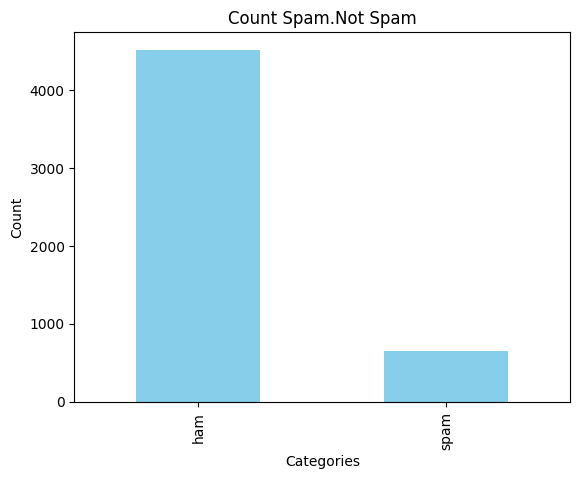

In [10]:
category_counts = df['v1'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count Spam.Not Spam')

plt.show()

### Feature Engineering

In [11]:
label_mapping = {'spam': 1, 'ham': 0}

df['v1'] = df['v1'].map(label_mapping)

In [12]:
df
#0mean Ham ,1 Mean Spam

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### Split Data

In [13]:
x=df["v2"]
y=df["v1"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Vectorization

In [15]:
feature=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)

In [16]:
x_train_feture=feature.fit_transform(X_train)
x_test_feture=feature.fit_transform(X_test)

In [17]:
y_train=y_train.astype("int")
y_test=y_test.astype("int")

In [18]:
print(x_train_feture)

  (0, 3545)	0.7455593142248959
  (0, 2588)	0.6664392762829205
  (2, 6589)	0.3136674984299076
  (2, 4696)	0.29654379102529516
  (2, 4002)	0.6378379419700079
  (2, 6999)	0.6378379419700079
  (3, 564)	0.2785767488573773
  (3, 1534)	0.23384958966251285
  (3, 52)	0.26549489341098675
  (3, 4344)	0.22076773421612225
  (3, 6770)	0.2300494583671639
  (3, 251)	0.19582167067522926
  (3, 4299)	0.18532229917229942
  (3, 4630)	0.26549489341098675
  (3, 1997)	0.26549489341098675
  (3, 516)	0.19460402332334106
  (3, 4419)	0.2562131692599451
  (3, 271)	0.23384958966251285
  (3, 5450)	0.2300494583671639
  (3, 3941)	0.18912243046764834
  (3, 5171)	0.20953002785296104
  (3, 3168)	0.19120469004402674
  (3, 4954)	0.23384958966251285
  (3, 1553)	0.20428654549041733
  (3, 6938)	0.19708708091575408
  :	:
  (4132, 1825)	0.3605065932469792
  (4132, 4696)	0.3418197199207224
  (4133, 5893)	0.376872105216547
  (4133, 4973)	0.36369662422743665
  (4133, 2451)	0.376872105216547
  (4133, 901)	0.36369662422743665
  (413

### Logestic Regression Model

In [24]:
logestic = LogisticRegression()

logestic .fit(x_train_feture, y_train)

y_pred = logestic.predict(x_train_feture)

accuracy = accuracy_score(y_train, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report \n", classification_report(y_train, y_pred))


Accuracy: 0.9613059250302297
Classification Report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3627
           1       0.99      0.69      0.81       508

    accuracy                           0.96      4135
   macro avg       0.98      0.84      0.90      4135
weighted avg       0.96      0.96      0.96      4135



### Decision Tree Classifier

In [25]:
DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(x_train_feture, y_train)

y_pred = DecisionTree.predict(x_train_feture)

accuracy = accuracy_score(y_train, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report \n", classification_report(y_train, y_pred))


Accuracy: 1.0
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3627
           1       1.00      1.00      1.00       508

    accuracy                           1.00      4135
   macro avg       1.00      1.00      1.00      4135
weighted avg       1.00      1.00      1.00      4135



### Random Forest Classifier

In [26]:
RandomForest = RandomForestClassifier(n_estimators=100, random_state=42)  

RandomForest.fit(x_train_feture, y_train)

y_pred =RandomForest.predict(x_train_feture)

accuracy = accuracy_score(y_train, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report \n", classification_report(y_train, y_pred))


Accuracy: 1.0
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3627
           1       1.00      1.00      1.00       508

    accuracy                           1.00      4135
   macro avg       1.00      1.00      1.00      4135
weighted avg       1.00      1.00      1.00      4135

